# Project Overview:
## This project analyzes user shopping behavior based on data from a grocery order dataset. The goals include identifying order patterns by day and hour, examining product reordering rates, and clustering users based on their order behavior to find meaningful customer segments.

## This project aims to explore user behavior within a grocery dataset, uncovering patterns related to order timing, reorder trends, and customer segmentation. Each step in the notebook helps to either preprocess the data, extract meaningful insights, or create clusters of customers based on ordering habits, which could be useful for targeted marketing or customer retention strategies.

## This approach ensures a structured flow: data loading and merging, data cleaning, exploratory analysis, and finally, customer segmentation using clustering. Each analysis step provides insights into different aspects of customer shopping behavior, helping to answer questions on when customers shop, what they reorder, and how often.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
order_products=pd.read_csv("order_products__prior.csv")

In [4]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [5]:
order=pd.read_csv("orders.csv")

In [6]:
products=pd.read_csv("products.csv")
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
# Merging order details with order metadata to create a complete dataset of past orders
merged_data=pd.merge(order_products,order,on='order_id')
merged_data.sample(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
24085837,2540258,2228,9,1,69091,prior,44,0,18,3.0
27153356,2863127,22959,2,1,82770,prior,12,0,10,8.0
26744414,2820222,10240,1,1,174624,prior,26,0,9,15.0
23992215,2530352,48679,6,1,47968,prior,20,0,9,22.0
21294028,2246059,39108,4,1,91276,prior,32,1,11,7.0


In [8]:
#Randomly analyzing data
merged_data[merged_data["order_id"]==2817775].head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26721119,2817775,2120,1,0,128461,prior,1,0,15,NaN
26721120,2817775,397,2,0,128461,prior,1,0,15,NaN
26721121,2817775,5011,3,0,128461,prior,1,0,15,NaN
26721122,2817775,39993,4,0,128461,prior,1,0,15,NaN
26721123,2817775,4605,5,0,128461,prior,1,0,15,NaN


In [9]:
# Checking for missing values to identify any gaps in the data
merged_data.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [10]:
# Merging with the products dataset to add product details into the main merged data
merged_data = pd.merge(merged_data, products, on='product_id')

In [11]:
merged_data.sample(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
5840282,616452,8955,5,1,199299,prior,24,1,9,8.0,Basil,16,4
18497365,1951167,47209,6,1,119072,prior,9,4,1,18.0,Organic Hass Avocado,24,4
27944935,2946796,19660,5,1,150924,prior,5,6,12,6.0,Spring Water,115,7


In [12]:
merged_data[merged_data['product_id']==35217].sample(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
28251241,2979289,35217,19,0,146571,prior,4,4,9,24.0,Toasted Sesame Seed Oil,19,13
26012860,2743259,35217,26,0,2156,prior,9,1,12,6.0,Toasted Sesame Seed Oil,19,13
15805433,1667644,35217,11,0,131716,prior,2,6,9,21.0,Toasted Sesame Seed Oil,19,13


In [13]:
# Exploring data structure after all merges, checking columns and data types
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 3.1+ GB


In [14]:
# Dropping unnecessary columns to keep only relevant data for analysis
merged_data.drop(['eval_set','aisle_id','product_name'],axis='columns',inplace=True)

In [15]:
merged_data.sample(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id
22907944,2416181,45104,8,1,119955,25,5,11,27.0,16
8196993,865241,31933,5,1,115013,5,5,8,7.0,16
3425899,361894,26369,2,1,98346,21,3,9,11.0,4
28690443,3025747,39719,16,1,22762,8,0,11,8.0,9
4001092,422186,47766,10,1,166666,30,0,14,7.0,4


In [16]:
# Summary statistics for numerical columns to understand the dataset better
merged_data.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110407e+01,9.921906e+00
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.778914e+00,6.281156e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,9.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,2.100000e+01


In [17]:
# Dropping rows with missing 'days_since_prior_order' to handle missing data
merged_data.dropna(subset='days_since_prior_order',inplace=True)

In [18]:
# Checking for any remaining missing values
merged_data.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
department_id             0
dtype: int64

In [19]:
merged_data.shape

(30356421, 10)

In [20]:
# Calculating number of unique orders per customer to get a sense of user order frequency
order_per_customer=merged_data.groupby('user_id')['order_id'].nunique()

## Calculating the number of unique orders of each Customer

In [21]:
order_per_customer

user_id
1          9
2         13
3         11
4          4
5          3
          ..
206205     2
206206    66
206207    15
206208    48
206209    12
Name: order_id, Length: 206209, dtype: int64

## Most Frequently bought products

In [22]:
merged_data.product_id.value_counts().head()

product_id
24852    443031
13176    360292
21137    248219
21903    226973
47209    202478
Name: count, dtype: int64

## Distribution of orders by hour to identify peak shopping times during the day

In [23]:
order_by_hours=merged_data.order_hour_of_day.value_counts()

In [24]:
order_by_hours

order_hour_of_day
10    2596225
11    2566878
14    2519485
15    2489791
13    2489682
12    2448001
16    2367078
9     2313702
17    1945550
8     1624151
18    1522270
19    1170203
20     910835
7      845487
21     746944
22     592910
23     376173
6      275086
0      203624
1      108192
5       82803
2       64016
4       49441
3       47894
Name: count, dtype: int64

In [25]:
order_by_hours.sort_index()

order_hour_of_day
0      203624
1      108192
2       64016
3       47894
4       49441
5       82803
6      275086
7      845487
8     1624151
9     2313702
10    2596225
11    2566878
12    2448001
13    2489682
14    2519485
15    2489791
16    2367078
17    1945550
18    1522270
19    1170203
20     910835
21     746944
22     592910
23     376173
Name: count, dtype: int64

## Plotting total orders by hour for daily order frequency analysis

<BarContainer object of 24 artists>

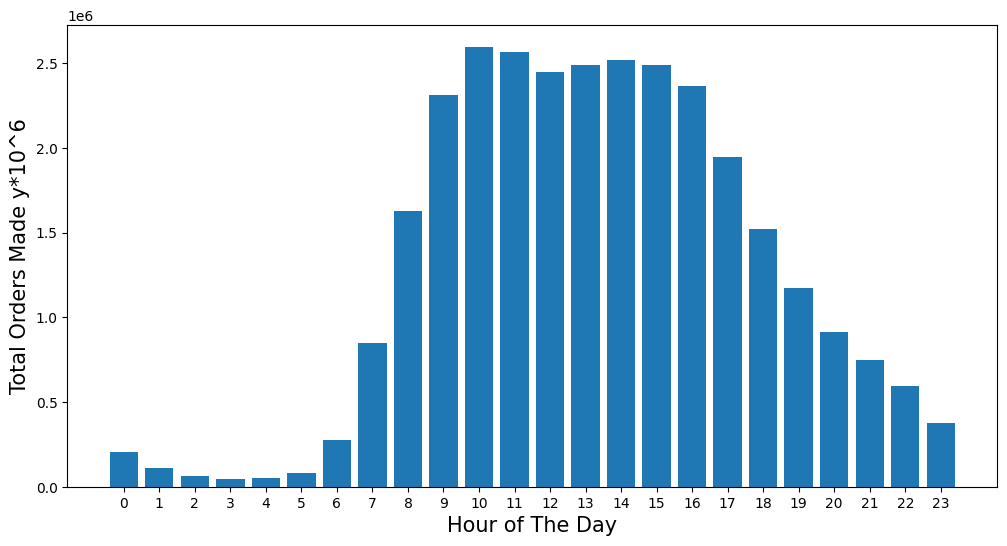

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(range(0,24))
plt.xlabel("Hour of The Day",fontsize=15)
plt.ylabel("Total Orders Made y*10^6",fontsize=15)
plt.bar(order_by_hours.index,order_by_hours.values)


## Orders by day of the week to analyze weekly shopping patterns

In [27]:
order_by_day=merged_data.order_dow.value_counts().sort_index()

In [28]:
order_by_day

order_dow
0    5784174
1    5308998
2    3951279
3    3603910
4    3557740
5    3955823
6    4194497
Name: count, dtype: int64

## Bar plot to visualize order frequency by weekday

<BarContainer object of 7 artists>

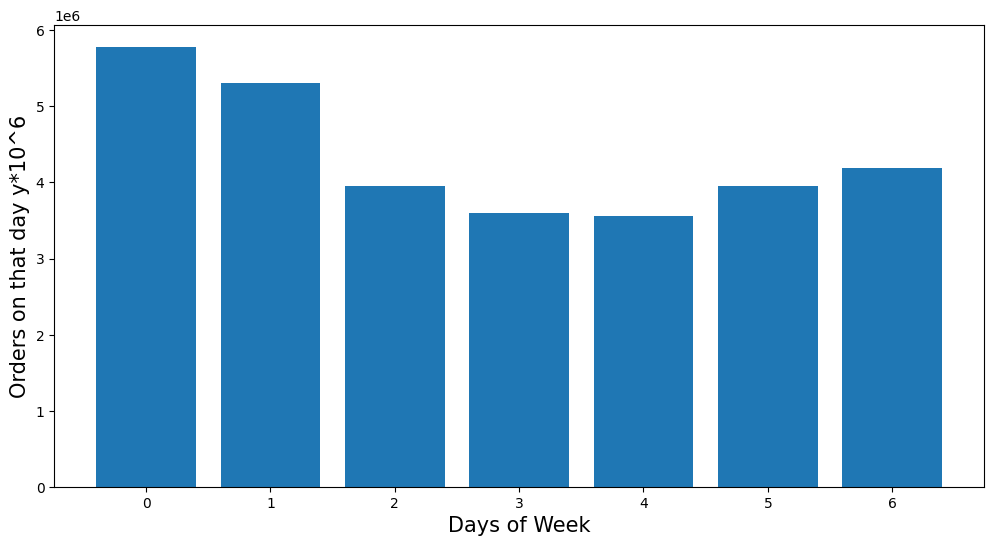

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(range(0,7))
plt.xlabel("Days of Week",fontsize=15)
plt.ylabel("Orders on that day y*10^6",fontsize=15)
plt.bar(order_by_day.index,order_by_day.values)

In [30]:
# Summing reorders per product to find products that are reordered most frequently
product_reorder=merged_data.groupby('product_id')['reordered'].sum().sort_values(ascending=False)

In [31]:
product_reorder

product_id
24852    398609
13176    315913
21137    205845
21903    186884
47209    170131
          ...  
4528          0
41465         0
34340         0
41467         0
7686          0
Name: reordered, Length: 49646, dtype: int64

In [32]:
# Calculating reorder rate across all products to assess overall reorder trends
reorder_rate = merged_data['reordered'].mean()*100 

In [33]:
reorder_rate

63.006557986529444

In [34]:
# Average time between orders for each customer to understand frequency of their shopping
days_since_prior_order=merged_data.groupby('user_id')['days_since_prior_order'].mean()

In [35]:
days_since_prior_order

user_id
1         20.259259
2         15.967033
3         11.487179
4         15.357143
5         14.500000
            ...    
206205    20.666667
206206     4.042705
206207    14.879397
206208     7.442105
206209    20.275862
Name: days_since_prior_order, Length: 206209, dtype: float64

In [62]:
# Creating a new feature set based on customer behavior for clustering analysis
customer_features = merged_data.groupby('user_id').agg({
    'order_id': 'nunique',               
    'add_to_cart_order': 'mean',         
    'reordered': 'mean'                   
}).reset_index()

In [63]:
customer_features

,user_id,order_id,add_to_cart_order,reordered
0,1,9,3.685185,0.759259
1,2,13,8.664835,0.510989
2,3,11,4.307692,0.705128
3,4,4,2.857143,0.071429
4,5,3,5.307692,0.538462
...,...,...,...,...
206204,206205,2,4.266667,0.533333
206205,206206,66,3.854093,0.480427
206206,206207,15,8.236181,0.658291
206207,206208,48,8.553383,0.720301


In [64]:
from sklearn.cluster import KMeans

# Using Elbow Method to find optimal number of clusters by plotting SSE for different cluster sizes

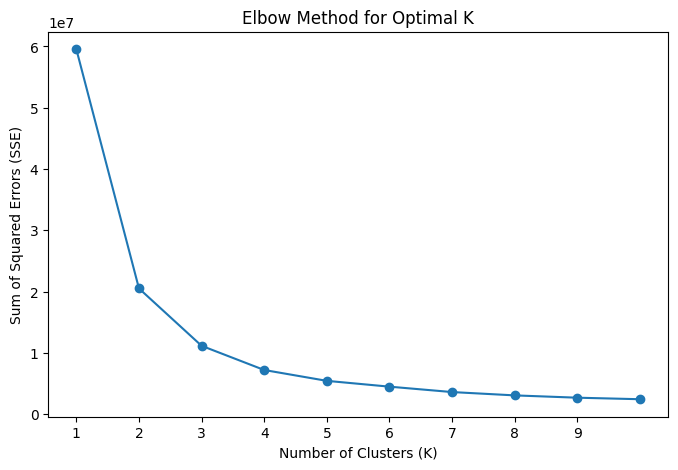

In [65]:
sse = []  
k_range = range(1, 11)  

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(customer_features[['order_id','add_to_cart_order','reordered']])
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xticks(range(1,10))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [66]:
kmeans=KMeans(n_clusters=3)

In [67]:
customer_features['cluster']=kmeans.fit_predict(customer_features[['order_id','add_to_cart_order','reordered']])

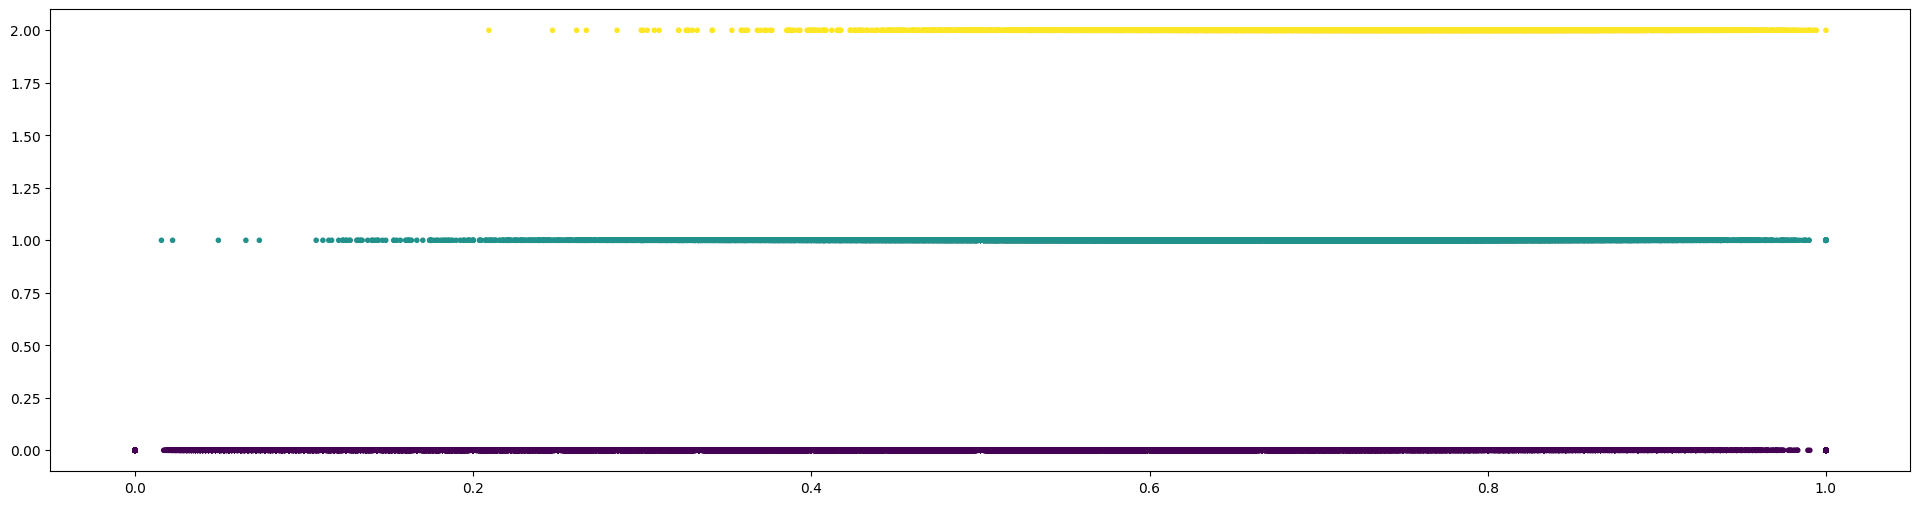

In [68]:
plt.figure(figsize=(24,6))
plt.scatter(customer_features.reordered,customer_features.cluster,c=customer_features.cluster, marker='.')
plt.show()

In [58]:
# Standardizing features before additional clustering or visualization tasks
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_features[['order_id', 'add_to_cart_order', 'reordered']])


In [71]:
sample_data = customer_features.sample(frac=0.2, random_state=42)

In [72]:
sample_data

,user_id,order_id,add_to_cart_order,reordered,cluster
189032,189033,7,6.848485,0.348485,0
113006,113007,2,1.333333,0.000000,0
40368,40369,15,7.594872,0.579487,0
2152,2153,16,3.683544,0.531646,0
194849,194850,63,5.682353,0.756303,2
...,...,...,...,...,...
24233,24234,4,5.400000,0.133333,0
74917,74918,7,9.800000,0.480000,0
122559,122560,13,6.611111,0.287037,0
110522,110523,5,18.089041,0.794521,0


## # Visualizing customer order behavior with scatter plot of a sample for clear interpretation

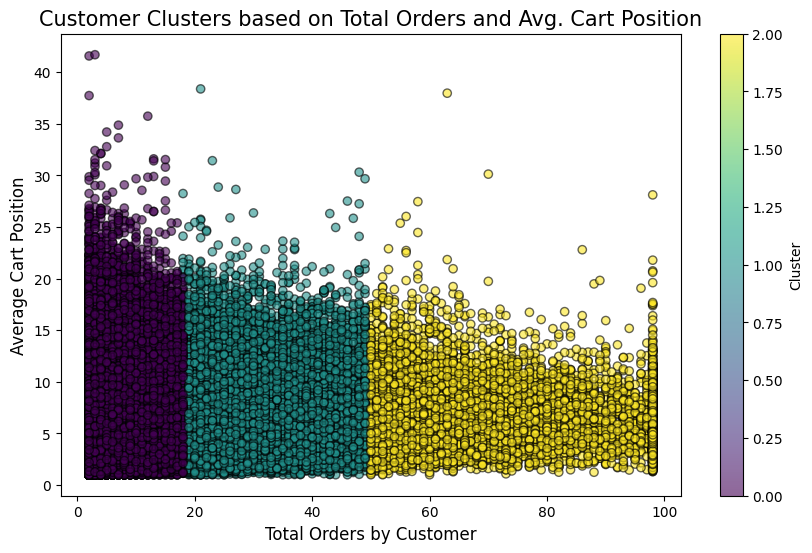

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(customer_features['order_id'], customer_features['add_to_cart_order'], 
            c=customer_features['cluster'], alpha=0.6, edgecolor='k')

# Adding labels and title to the plot
plt.title("Customer Clusters based on Total Orders and Avg. Cart Position", fontsize=15)
plt.xlabel("Total Orders by Customer", fontsize=12)
plt.ylabel("Average Cart Position", fontsize=12)
plt.colorbar(label='Cluster')
plt.show()